# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [101]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_left_count = len(cities)
city_left_count

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [102]:
#Setting the lists for our Data Frame
sets = [cities[x:x+50] for x in range(0,len(cities),50)]
lat = []
lng = []
max_temp = []
humidity=[]
cloudiness = []
wind_speed = []
country = []
date = []
cities2 = []
# Saving config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Building partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(f"Beginning Data Retrieval")
# Creating a loop through each rown in the dataframe to gather each city's weather info
for i in range(10):
    print(f"--------------------------------")
    time.sleep(10)
    for x in range(50):
        response = requests.get(query_url + sets[i][x]).json()
        # using try/except construct to skip over missing cities or missing data
        try:
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            cities2.append(sets[i][x])
            print(f" Processing Record {x+1} of Set {i+1} | {sets[i][x]}")
        except:
            print(f"City not found. Skipping...")
           
            pass
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
--------------------------------
 Processing Record 1 of Set 1 | saint-joseph
 Processing Record 2 of Set 1 | hilo
 Processing Record 3 of Set 1 | chuy
 Processing Record 4 of Set 1 | albany
 Processing Record 5 of Set 1 | kodiak
City not found. Skipping...
 Processing Record 7 of Set 1 | rikitea
 Processing Record 8 of Set 1 | tagusao
 Processing Record 9 of Set 1 | jamestown
 Processing Record 10 of Set 1 | trairi
 Processing Record 11 of Set 1 | hobart
 Processing Record 12 of Set 1 | mataura
 Processing Record 13 of Set 1 | bredasdorp
 Processing Record 14 of Set 1 | la ligua
City not found. Skipping...
 Processing Record 16 of Set 1 | shimanovsk
 Processing Record 17 of Set 1 | tuktoyaktuk
 Processing Record 18 of Set 1 | fort nelson
 Processing Record 19 of Set 1 | orange cove
 Processing Record 20 of Set 1 | hermanus
 Processing Record 21 of Set 1 | jacareacanga
 Processing Record 22 of Set 1 | saldanha
 Processing Record 23 of Set 1 | uige
City not foun

 Processing Record 48 of Set 4 | villazon
 Processing Record 49 of Set 4 | dapaong
 Processing Record 50 of Set 4 | lavrentiya
--------------------------------
 Processing Record 1 of Set 5 | sorong
 Processing Record 2 of Set 5 | hualmay
 Processing Record 3 of Set 5 | dingle
 Processing Record 4 of Set 5 | nantucket
 Processing Record 5 of Set 5 | tecoanapa
City not found. Skipping...
 Processing Record 7 of Set 5 | toyooka
 Processing Record 8 of Set 5 | hasaki
 Processing Record 9 of Set 5 | yerbogachen
 Processing Record 10 of Set 5 | tutayev
 Processing Record 11 of Set 5 | asau
 Processing Record 12 of Set 5 | aransas pass
 Processing Record 13 of Set 5 | carnarvon
 Processing Record 14 of Set 5 | kuah
 Processing Record 15 of Set 5 | hami
 Processing Record 16 of Set 5 | frontignan
 Processing Record 17 of Set 5 | tombouctou
 Processing Record 18 of Set 5 | coquimbo
 Processing Record 19 of Set 5 | nhulunbuy
 Processing Record 20 of Set 5 | bandarbeyla
 Processing Record 21 of 

 Processing Record 46 of Set 8 | bundaberg
 Processing Record 47 of Set 8 | atherton
 Processing Record 48 of Set 8 | amga
 Processing Record 49 of Set 8 | sitka
 Processing Record 50 of Set 8 | rayadrug
--------------------------------
 Processing Record 1 of Set 9 | luangwa
 Processing Record 2 of Set 9 | sao felix do xingu
 Processing Record 3 of Set 9 | klaksvik
 Processing Record 4 of Set 9 | ponta do sol
 Processing Record 5 of Set 9 | huimanguillo
 Processing Record 6 of Set 9 | rolla
 Processing Record 7 of Set 9 | kharp
 Processing Record 8 of Set 9 | den helder
 Processing Record 9 of Set 9 | plettenberg bay
 Processing Record 10 of Set 9 | semey
 Processing Record 11 of Set 9 | saint george
 Processing Record 12 of Set 9 | sirajganj
 Processing Record 13 of Set 9 | breves
 Processing Record 14 of Set 9 | iquitos
 Processing Record 15 of Set 9 | jiayuguan
 Processing Record 16 of Set 9 | huarmey
 Processing Record 17 of Set 9 | zhuanghe
 Processing Record 18 of Set 9 | labuha

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [103]:
# Creating a dictionary to establish the dataframe
weather_data = ({
                        "City" : cities2,
                        "Lat" : lat,
                        "Lng" : lng,
                        "Max Temp" : max_temp,
                        "Humidity" : humidity,
                        "Cloudiness" : cloudiness,
                        "Wind Speed" : wind_speed,
                        "Country" : country,
                        "Date" : date
                })
weather_data

{'City': ['saint-joseph',
  'hilo',
  'chuy',
  'albany',
  'kodiak',
  'rikitea',
  'tagusao',
  'jamestown',
  'trairi',
  'hobart',
  'mataura',
  'bredasdorp',
  'la ligua',
  'shimanovsk',
  'tuktoyaktuk',
  'fort nelson',
  'orange cove',
  'hermanus',
  'jacareacanga',
  'saldanha',
  'uige',
  'kapaa',
  'quatre cocos',
  'georgetown',
  'weihe',
  'cherskiy',
  'kungurtug',
  'tasiilaq',
  'owensboro',
  'haines junction',
  'mahebourg',
  'port alfred',
  'saint-philippe',
  'victoria',
  'sur',
  'bambous virieux',
  'luderitz',
  'nelson bay',
  'bluff',
  'narsaq',
  'guerrero negro',
  'tiksi',
  'pevek',
  'cape town',
  'ushuaia',
  'mehamn',
  'avarua',
  'ciudad bolivar',
  'clyde river',
  'punta arenas',
  'khor',
  'phatthalung',
  'san quintin',
  'sao jose da coroa grande',
  'port hardy',
  'namatanai',
  'hithadhoo',
  'axim',
  'ganzhou',
  'lata',
  'gamba',
  'urumqi',
  'berlevag',
  'broken hill',
  'port elizabeth',
  'east london',
  'vaini',
  'mayo',
 

In [76]:
# Creating a dataframe to hold the variables.
weather_data_df = pd.DataFrame(weather_data)
weather_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albania,41.0000,20.0000,17.66,49,100,1.15,AL,1644671908
1,chokurdakh,70.6333,147.9167,-19.11,96,100,6.05,RU,1644671908
2,banda aceh,5.5577,95.3222,26.30,84,39,6.64,ID,1644671909
3,olafsvik,64.8945,-23.7142,-2.10,69,46,12.06,IS,1644671909
4,shubarkuduk,49.1447,56.4872,0.16,93,100,9.65,KZ,1644671909
...,...,...,...,...,...,...,...,...,...
84,jacareacanga,-6.2222,-57.7528,26.19,85,100,0.62,BR,1644672034
85,sao joao da barra,-21.6403,-41.0511,25.05,81,100,2.33,BR,1644672034
86,haines junction,60.7522,-137.5108,-1.03,74,100,1.03,CA,1644671817
87,shingu,33.7333,135.9833,5.51,66,0,2.53,JP,1644672035


In [104]:
# Exporting the city data into a csv and Showing the top of the data frame
weather_data_df.to_csv("output_data_file")
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albania,41.0000,20.0000,17.66,49,100,1.15,AL,1644671908
1,chokurdakh,70.6333,147.9167,-19.11,96,100,6.05,RU,1644671908
2,banda aceh,5.5577,95.3222,26.30,84,39,6.64,ID,1644671909
3,olafsvik,64.8945,-23.7142,-2.10,69,46,12.06,IS,1644671909
4,shubarkuduk,49.1447,56.4872,0.16,93,100,9.65,KZ,1644671909


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [105]:
# Inspecting the data for any cities with humidity >100%
humidity_check = weather_data_df["Humidity"].describe(include = "all")
print("By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!")
humidity_check


By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!


count     89.000000
mean      75.325843
std       18.259976
min        8.000000
25%       68.000000
50%       79.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [79]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

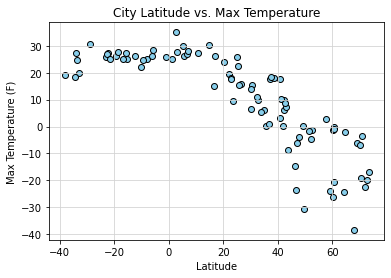

In [106]:
# Generating a scatter plot of Latitude vs. Temperature 
plt.scatter(weather_data_df["Lat"],weather_data_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig1.png")
plt.show()

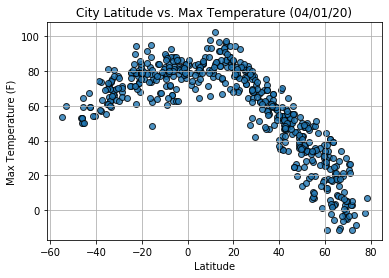

## Latitude vs. Humidity Plot

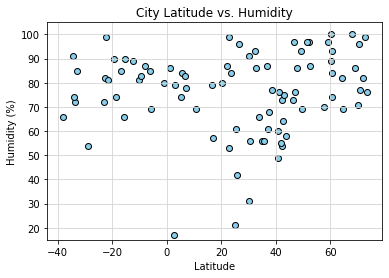

In [107]:
# Generating a scatter plot of Latitude vs. Humidity Plot
plt.scatter(weather_data_df["Lat"],weather_data_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig2.png")
plt.show()

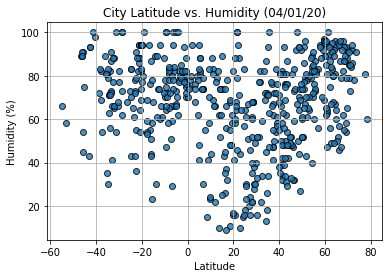

## Latitude vs. Cloudiness Plot

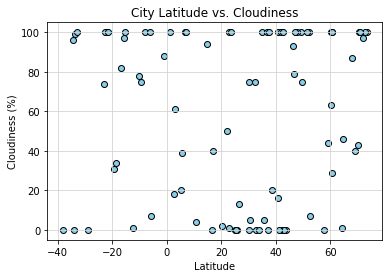

In [108]:
# Generating a scatter plot of Latitude vs. Cloudiness
plt.scatter(weather_data_df["Lat"],weather_data_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig3.png")
plt.show()

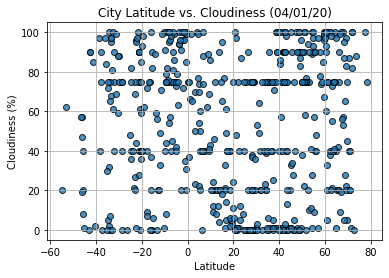

## Latitude vs. Wind Speed Plot

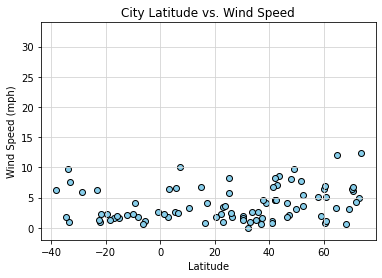

In [109]:
# Generating a scatter plot of Latitude vs. Wind Speed
plt.scatter(weather_data_df["Lat"],weather_data_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig4.png")
plt.show()

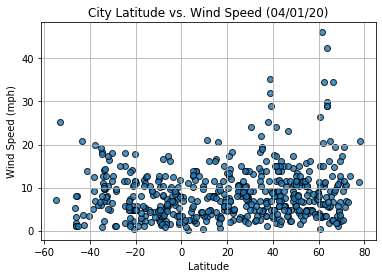

## Linear Regression

In [110]:
# Create Northern and Southern Hemisphere DataFrames

# Generating the Northern Hemisphere DataFrame
northern_hemisphere = weather_data_df.loc[weather_data_df["Lat"] >= 0]
northern_cities_count = len(northern_hemisphere)
print("There are {} cities in the northern hemisphere out of {} cities total, representing {:.1%} of all cities in the data set."
     .format(northern_cities_count, city_left_count, (northern_cities_count/city_left_count)))

# Generating the Southern Hemisphere DataFrame
southern_hemisphere = weather_data_df.loc[weather_data_df["Lat"] < 0]
southern_cities_count = len(southern_hemisphere)
print("There are {} cities in the southern hemisphere out of {} cities total, representing {:.1%} of all cities in the data set."
     .format(southern_cities_count, city_left_count, (southern_cities_count/city_left_count)))

There are 67 cities in the northern hemisphere out of 609 cities total, representing 11.0% of all cities in the data set.
There are 22 cities in the southern hemisphere out of 609 cities total, representing 3.6% of all cities in the data set.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7301223849423147


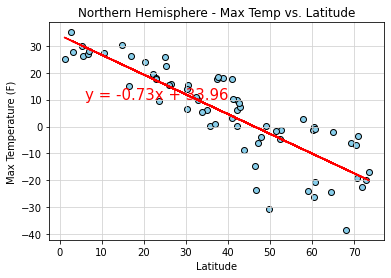

In [111]:
# Generating a linear regression model of Max Temp vs. Latitude on the Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemisphere["Lat"],northern_hemisphere["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("fig5.png")
plt.show()

The r-value is: 0.46937863826630627


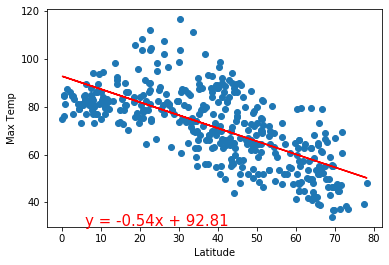

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.13799342040239404


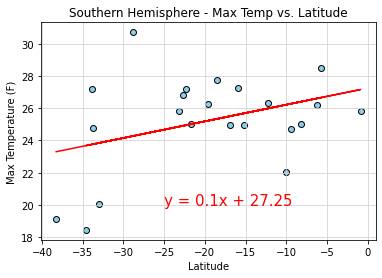

In [112]:
# Generating a linear regression model of Max Temp vs. Latitude on the Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("fig6.png")
plt.show()

The r-value is: 0.6082708688906918


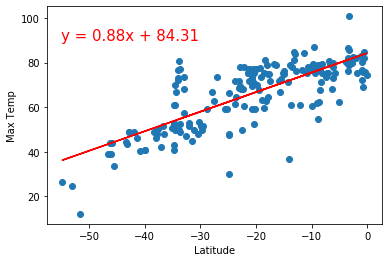

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12412138914372109


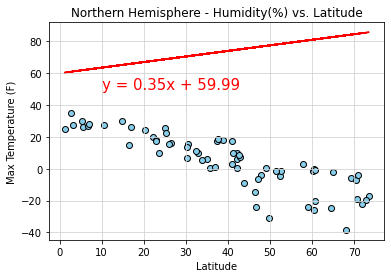

In [113]:
# Generating a linear regression model of Humidity vs. Latitude on the Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemisphere["Lat"],northern_hemisphere["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("fig7.png")
plt.show()

The r-value is: 0.000543987878808455


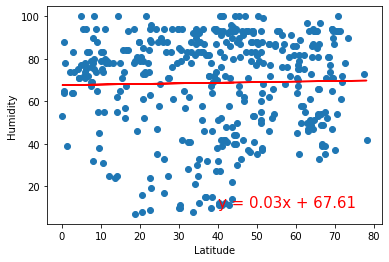

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05168203571333852


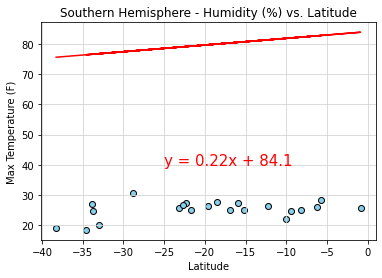

In [114]:
# Generating a linear regression model of Humidity vs. Latitude on the Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("fig8.png")
plt.show()

The r-value is: 0.014985174297345524


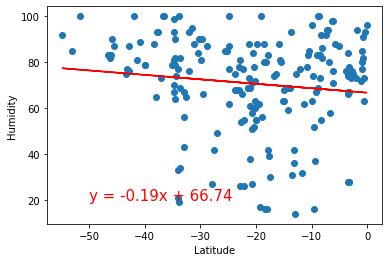

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.059102086052422384


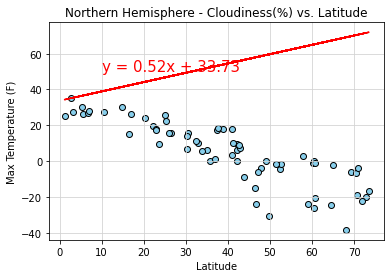

In [115]:
# Generating a linear regression model of Cloudiness vs. Latitude on the Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemisphere["Lat"],northern_hemisphere["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("fig9.png")
plt.show()

The r-value is: 0.0020898727664228514


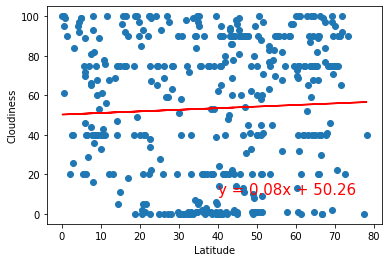

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02835607705731356


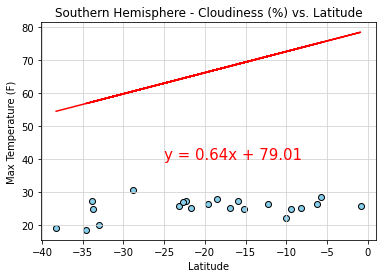

In [116]:
# Generating a linear regression model of Cloudiness vs. Latitude on the Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("fig10.png")
plt.show()

The r-value is: 0.0035263772085582894


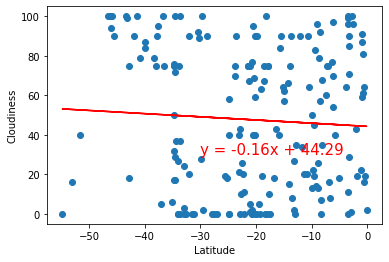

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05378192467883047


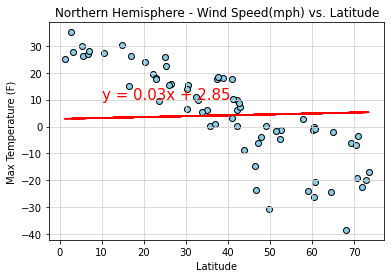

In [117]:
# Generating a linear regression model of Wind Speed vs. Latitude on the Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemisphere["Lat"],northern_hemisphere["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("Northern Hemisphere - Wind Speed(mph) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("fig11.png")
plt.show()

The r-value is: 0.04019723576144484


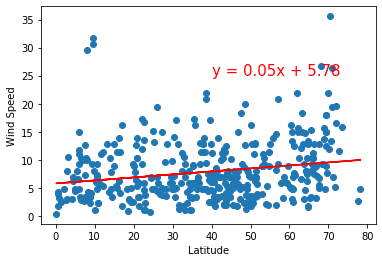

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2739594305992983


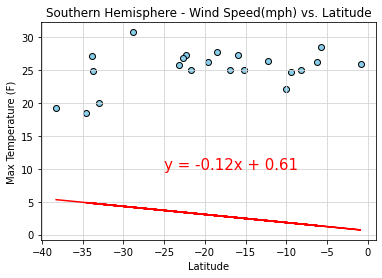

In [118]:
# Generating a linear regression model of Wind Speed vs. Latitude on the Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("Southern Hemisphere - Wind Speed(mph) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("fig12.png")
plt.show()

The r-value is: 0.017128274759839232


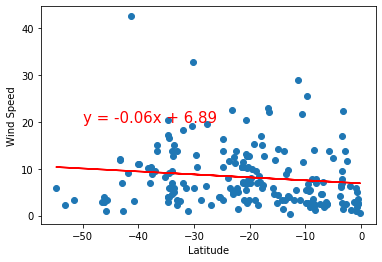